About bike sharing system :
    
This data set consists of three types of entities: 
(a) the specification of an auto in terms of various characteristics. 
(b) its assigned insurance risk rating.
(c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Objective :
The aim here is to explore the data set and find basic relationships of different features with an automobile's price. We will be starting with some brief exploratory analysis involving summary statistics and graphical visualization. 

In [1]:
# Loading necessary packages
import numpy as np
import pandas as pd

In [2]:
auto = pd.read_table('C:/Users/majay/Desktop/Python/Automobile_data.txt', sep = ',') # read the table with comma seperator
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto.shape  # shape gives the dimensionality of the data frame .so here we have 205 rows 26 columns

(205, 26)

In [4]:
auto.isnull().sum() # lets see for any null values in the dataset.

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Looks like there are no null values in the dataset. But there are some characters like ? in the dataset that doesn't make any sense. Thus they have to be removed or replaced.
Now the value to be replaced depends on the other values of the column. Sometimes we replace it with the mean value whereas other times we need to use other means for determining the value.

Also if you see below, there are a lot of object types which needs to be changed to either into or float to perform analysis.


In [5]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Cleaning the normalized losses column

In [6]:
auto[auto['normalized-losses']=='?'].count() # Normalized-losses has 41 '?'s

symboling            41
normalized-losses    41
make                 41
fuel-type            41
aspiration           41
num-of-doors         41
body-style           41
drive-wheels         41
engine-location      41
wheel-base           41
length               41
width                41
height               41
curb-weight          41
engine-type          41
num-of-cylinders     41
engine-size          41
fuel-system          41
bore                 41
stroke               41
compression-ratio    41
horsepower           41
peak-rpm             41
city-mpg             41
highway-mpg          41
price                41
dtype: int64

In [7]:
# converting the ? with the mean values in the 'normalize-losses' column
nl=auto['normalized-losses'].loc[auto['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
auto['normalized-losses']=auto['normalized-losses'].replace('?',nmean).astype(int)
auto.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


Similarly lets fill the missing values for other columns

In [8]:
# Prices column
# checking how many rows are numeric and how many aren't.
auto['price'].str.isnumeric().value_counts()

# Check out the values which are not numeric
auto['price'].loc[auto['price'].str.isnumeric() == False]

# Setting the missing value to mean of price and convert the datatype to integer
price = auto['price'].loc[auto['price'] != '?']
pmean = price.astype(str).astype(int).mean()
auto['price'] = auto['price'].replace('?',pmean).astype(int)
auto['price'].head()


0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [9]:
# Cleaning Horsepower
# checking how many rows are numeric and how many aren't.
auto['horsepower'].str.isnumeric().value_counts()


True     203
False      2
Name: horsepower, dtype: int64

In [10]:
# Check out the values which are not numeric
auto['horsepower'].loc[auto['horsepower'].str.isnumeric() == False]

130    ?
131    ?
Name: horsepower, dtype: object

In [11]:
# replacing the horsepower misssing values

horsepower = auto['horsepower'].loc[auto['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
auto['horsepower'] = auto['horsepower'].replace('?',pmean).astype(int)

In [12]:
# cleaning the bore

# Find out the number of invalid value
auto['bore'].loc[auto['bore'] == '?']


# Replace the non-numeric value to null and conver the datatype
auto['bore'] = pd.to_numeric(auto['bore'],errors='coerce') # converting from Object to numeric and use of 'coerce' -> invalid parsing will be set as NaN

In [13]:
#cleaning stoke the similar way
auto['stroke'] = pd.to_numeric(auto['stroke'],errors='coerce')
auto.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [14]:
#Cleaning the peak rpm data

# Convert the non-numeric data to null and convert the datatype
auto['peak-rpm'] = pd.to_numeric(auto['peak-rpm'],errors='coerce')
auto.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [15]:
# cleaning the num-of-doors data
# remove the records which are having the value '?'

auto['num-of-doors'].loc[auto['num-of-doors']=='?']
auto=auto[auto['num-of-doors']!='?']
auto['num-of-doors'].loc[auto['num-of-doors'] == '?'] # will give no values as both the entries has been deleted.


Series([], Name: num-of-doors, dtype: object)

In [16]:
auto.isnull().sum() # Now we have 3 columns with NaN's.

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
pd.set_option('display.max_columns', None) # This will display all the columns.
auto.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950


Now let us check the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. 

In [18]:
auto.describe() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,130.147783,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,233.556650,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,35.956490,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,1297.917006,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,128.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,164.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,120.500000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,13207.000000,6600.000000,49.000000,54.000000,45400.000000


lets perform some univariate analysis

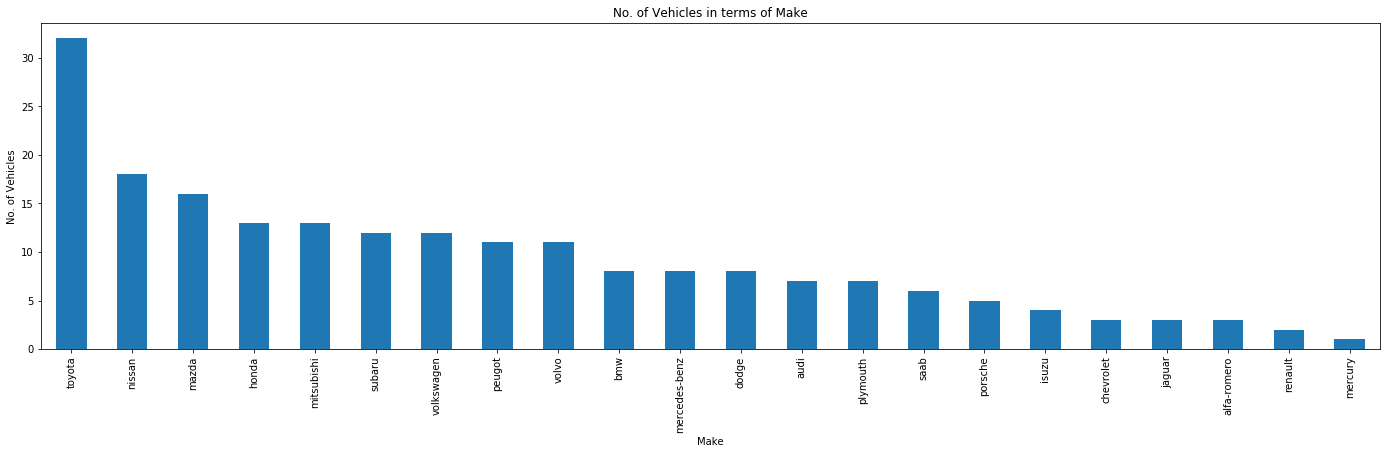

In [19]:
#To do plottting we need to import Matplot library.

import matplotlib.pyplot as plt
% matplotlib inline    
#here inline means plotting within the notebook

auto.make.value_counts().nlargest(23).plot(kind='bar',figsize=(24,6)) # here there are 23 unique values under column -'make'. ]
# So we display all 23 of them. nomrally 10 will be a good number for visualization
plt.title("No. of Vehicles in terms of Make")
plt.xlabel("Make")
plt.ylabel("No. of Vehicles")


From above plot, Toyota has most number of vehicles with more than 40% than the 2nd highest Nissan

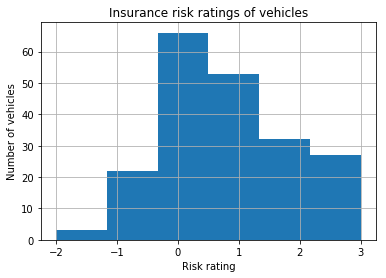

In [20]:
# Insurance risk ratings Histogram. 

auto.symboling.hist(bins=6)
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');




Symboling or the insurance risk rating have the ratings between -3 and 3, however for our dataset it starts from -2. There are more cars in the range of 0 and 1.

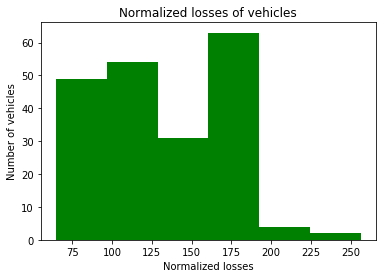

In [21]:
#Normalized losses histogram

auto['normalized-losses'].hist(bins=6,color='Green',grid=False) # grid removes the lines
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

Normalized losses which is the average loss payment per insured vehicle has more number of cars in the range between 65 and 175.

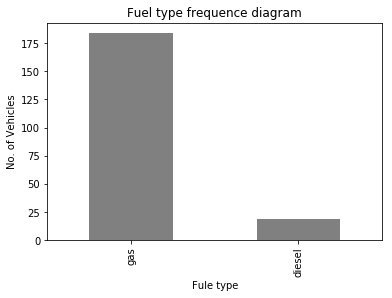

In [22]:
#Fuel Type - Bar Graph

auto['fuel-type'].value_counts().plot(kind='bar',color='grey')
plt.title("Fuel type frequence diagram")
plt.ylabel('No. of Vehicles')
plt.xlabel('Fule type');

You can see there are more number of gas type vehicles than diesel

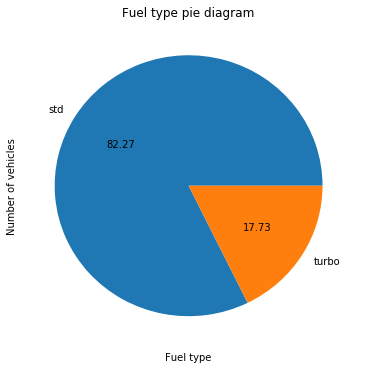

In [23]:
# Fuel type pie diagram
auto['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

Most preferred fuel type for the customer is standard vs turbo having more than 80% of the share.

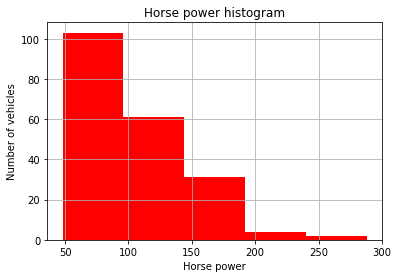

In [24]:
auto.horsepower[np.abs(auto.horsepower-auto.horsepower.mean())<=(3*auto.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power')

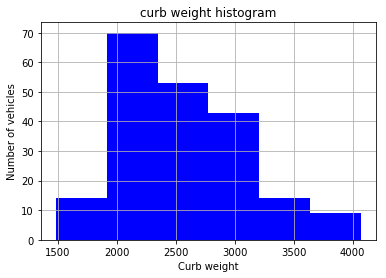

In [25]:
#Curb weight histogram

auto['curb-weight'].hist(bins=6,color='blue') 
plt.title("curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

Curb weight of the cars are distributed between 1500 and 4000 approximately

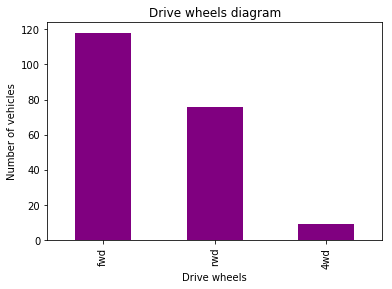

In [26]:
# Drive wheels bar chart

auto['drive-wheels'].value_counts().plot(kind='bar',color='purple')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

From above plot, front wheel drive has most number of cars followed by rear wheel and four wheel. Four wheel has very less number of cars.

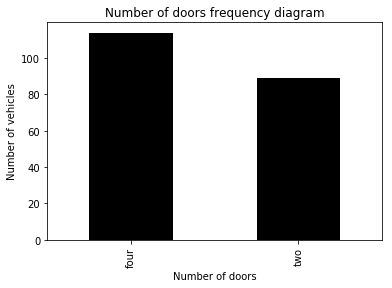

In [27]:
#Number of doors bar chart

auto['num-of-doors'].value_counts().plot(kind='bar',color='black')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

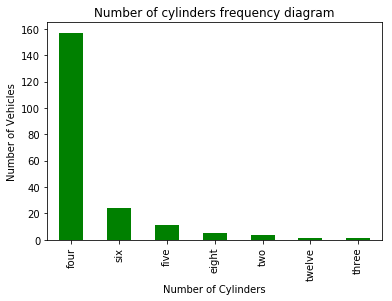

In [28]:
# no of cylinders Bar Graph

auto['num-of-cylinders'].value_counts().plot(kind='bar',color='green')
plt.title("Number of cylinders frequency diagram")
plt.ylabel('Number of Vehicles')
plt.xlabel('Number of Cylinders');

Almost 160 cars have 4 cylinders which is more than 75%.

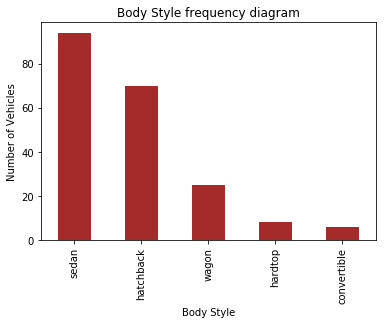

In [29]:
#Body Style Bar Graph

auto['body-style'].value_counts().plot(kind='bar',color='brown')
plt.title("Body Style frequency diagram")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body Style');

Sedan and Hutchback constitues to more than 60% in the body style feature.

Now lets see the correlation between different columns using heat map. The highly correlated columns will have same or 
similar charecteristics and one of them can be dropped or not considered (in general).

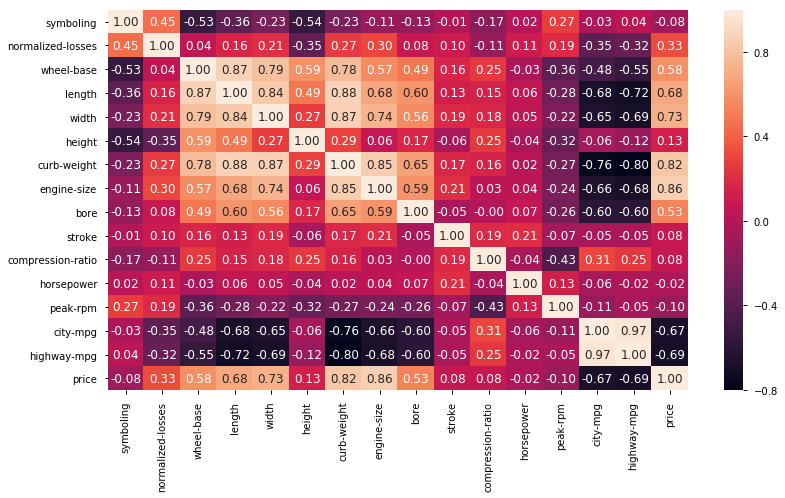

In [30]:
import seaborn as sns
corr=auto.corr()
sns.set_context("notebook",font_scale=1.0,rc={"lines.linewidth":3})
plt.figure(figsize=(13,7))
a=sns.heatmap(corr,annot=True,fmt ='.2f')

There are some good inferences we can take from the above correlation heat map.

Price is more correlated with engine size and curb weight of the car.
Curb weight is mostly correlated with engine size, length, width and wheel base which is expected as these adds up the weight of the car.
Wheel base is highly correlated with length and width of the car.

Lets start with the bivariate analysis :

Lets see price of cars based on the make.

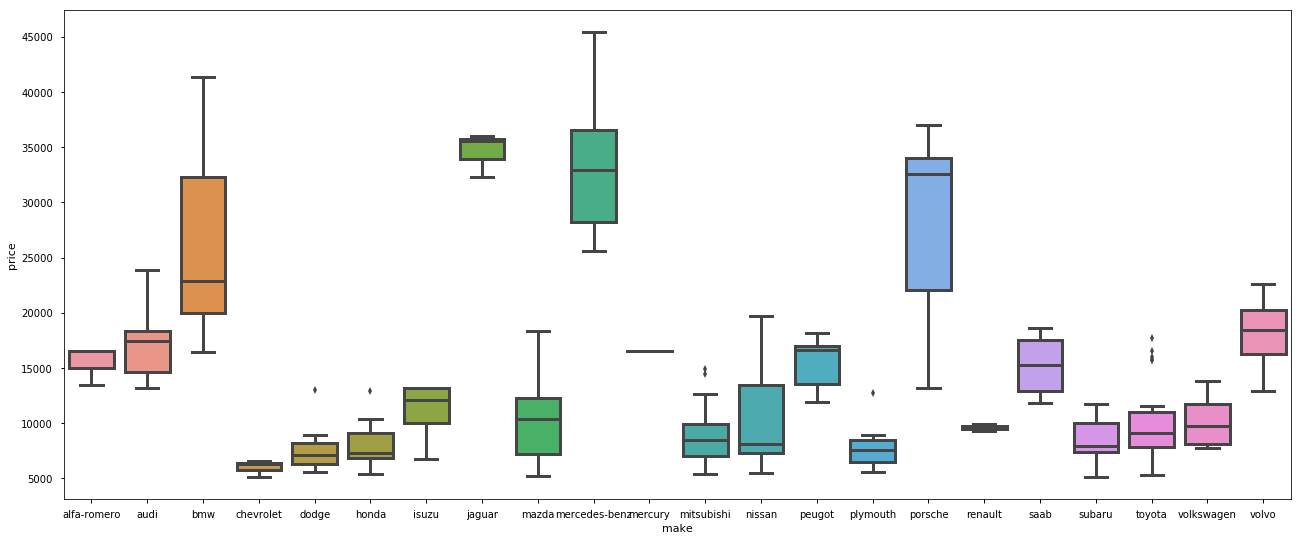

In [36]:
# Create a Boxplot of Price and make

plt.rcParams['figure.figsize']=(22,9)
sns.boxplot(data=auto,x='make',y='price');

Observations from the above box plot :

○ The most expensive car is manufactured by Mercedes benz and the least expensive is Chevrolet.

○ The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche.

○ Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru.

○ Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars.

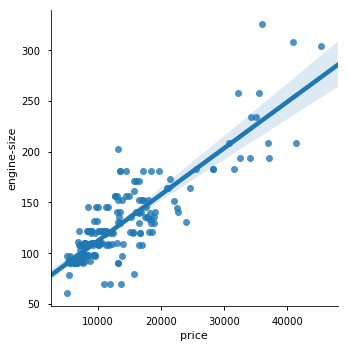

In [37]:
# Scatter plot of price and engine size:

sns.lmplot('price',"engine-size",data=auto);

We can see that bigger the engine size higher is the price of car.

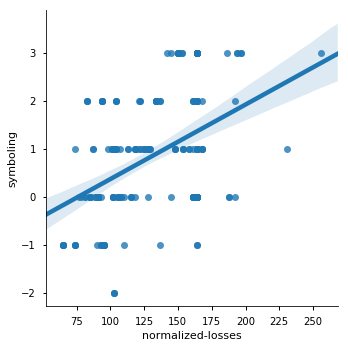

In [32]:
#Scatter plot of normalized losses and symboling

sns.lmplot('normalized-losses',"symboling",data=auto)

From the above plot, we can say that if a car has got negative rating, then the normalized losses are less or lesser the rating, lesser the normalized loss.

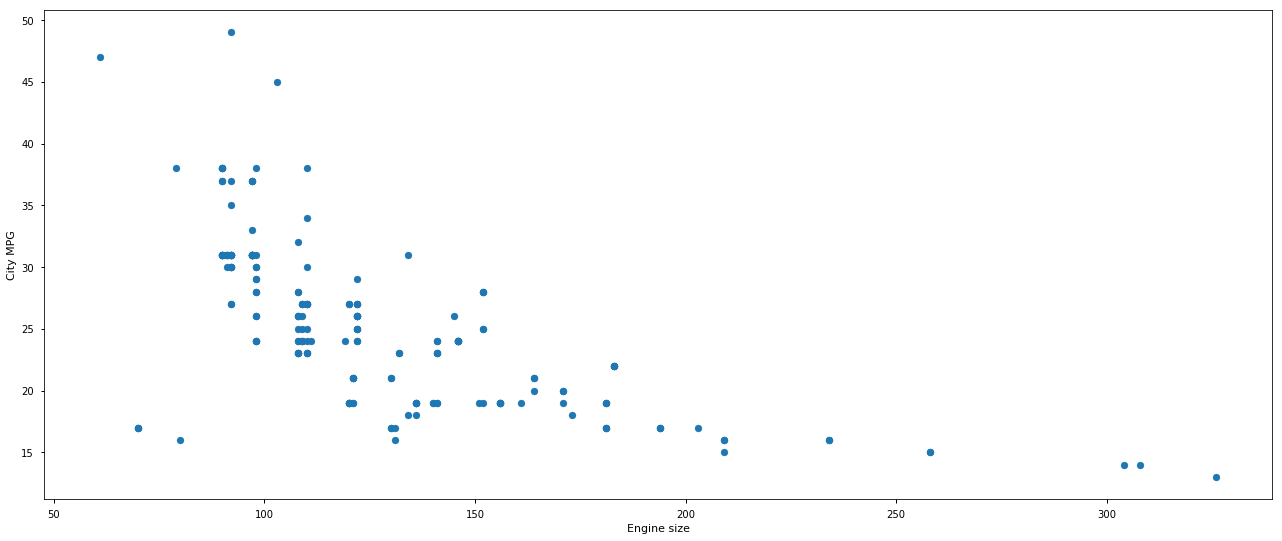

In [38]:
# Scatter plot of engine size and city MPH

plt.scatter(auto['engine-size'],auto['city-mpg'])
plt.xlabel('Engine size')
plt.ylabel('City MPG');

From above plot, we can observe an inverse relationship i.e is more than engine size - less the MPG it gives.

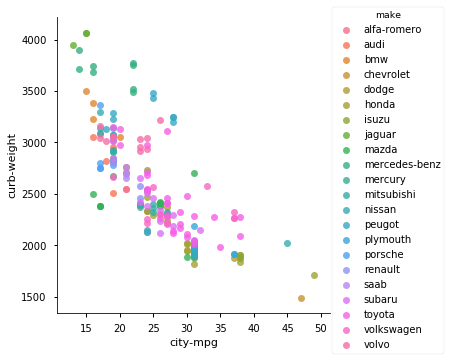

In [36]:
# Scatter plot of City and Highway MPG, Curb weight based on Make of the car (i dont think adding make gives value here a both city- mpg nd highway- mpg are highly corellated, u cn drop
#this plot while uploading into kaggle)

g = sns.lmplot('city-mpg',"curb-weight", auto, hue="make", fit_reg=False);

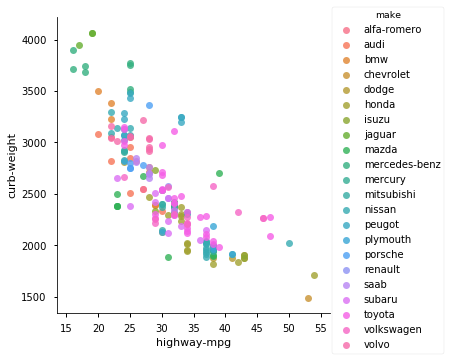

In [37]:
h = sns.lmplot('highway-mpg',"curb-weight", auto, hue="make", fit_reg=False);

In [38]:
# From above we can make out that heavier the curb weight - less mileage (both city adn highway)

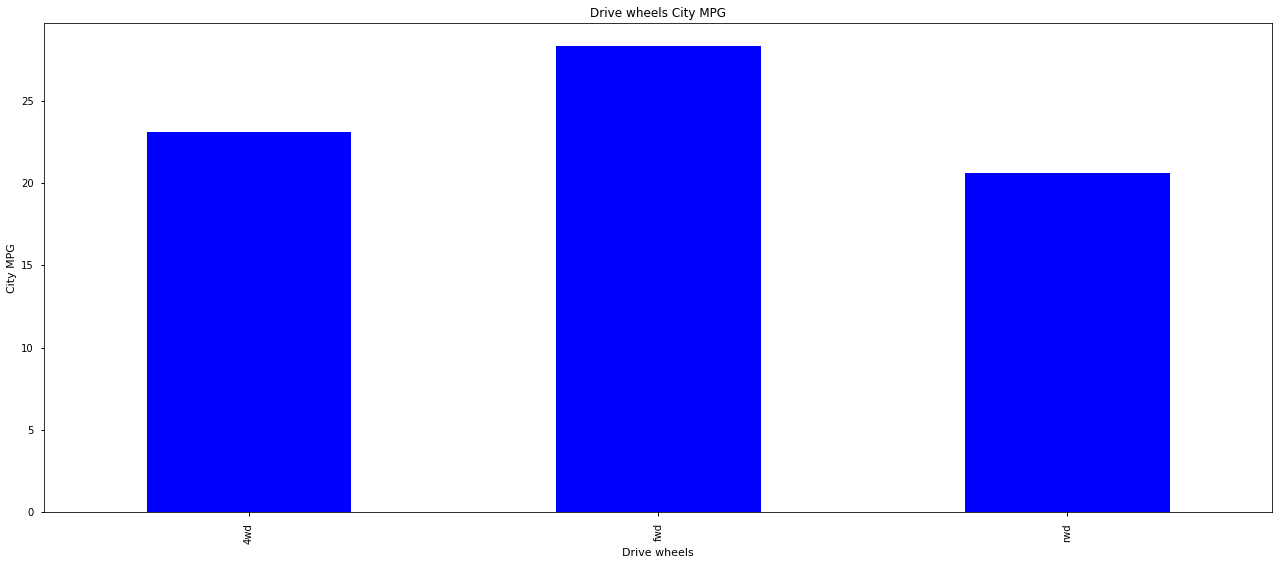

In [39]:
# Drive wheels and City MPG bar chart

auto.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar',color='blue')
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

In [40]:
#Boxplot of Drive wheels and Price

#Findings: It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

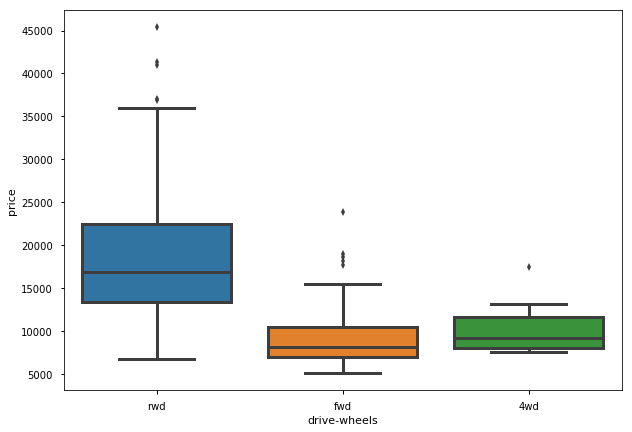

In [41]:
plt.rcParams['figure.figsize']=(10,7)
sns.boxplot(x='drive-wheels',y='price',data=auto);

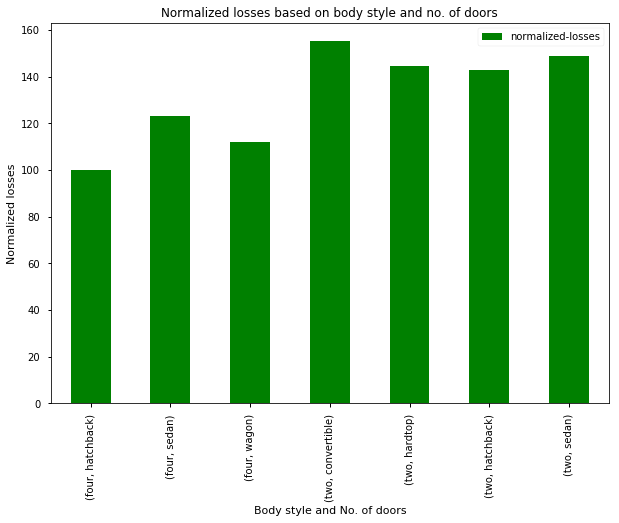

In [43]:
# Normalized losses based on no. of doors and body style

import pandas as pd
pd.pivot_table(auto, index=['num-of-doors','body-style'],values='normalized-losses').plot(kind='bar',color='green')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

In [ ]:
# from above plot, we can understand tht 2 door cars has more number of losses than the 4 door cars.
#normalized losses takes manythings into considertion amound which no.of cars and body style is included.